# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


In [3]:
# Set units to metric for temperatures
units = "metric"

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_json["coord"]["lat"]
        city_lng = city_json['coord']['lon']
        city_max_temp = city_json['main']['temp_max']
        city_humidity = city_json['main']['humidity']
        city_clouds = city_json['clouds']['all']
        city_wind = city_json['wind']['speed']
        city_country = city_json['sys']['country']
        city_date = city_json['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | silver city
Processing Record 3 of Set 1 | colchani
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | arauco
Processing Record 6 of Set 1 | flying fish cove
Processing Record 7 of Set 1 | nantucket
Processing Record 8 of Set 1 | codrington
Processing Record 9 of Set 1 | tyukhtet
Processing Record 10 of Set 1 | kristinestad
Processing Record 11 of Set 1 | guatire
Processing Record 12 of Set 1 | bilibino
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | padang
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | norfolk
Processing Record 18 of Set 1 | acapulco de juarez
Processing Record 19 of Set 1 | akjoujt
Processing Record 20 of Set 1 | wuyang
Processing Record 21 of Set 1 | merizo village
Processing Record 22 of Set 1 | wai

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = {
    "City": city,
    "Lat": city_lat,
    "Lng": city_lng,
    "Max Temp": city_max_temp,
    "Humidity": city_humidity,
    "Cloudiness": city_clouds,
    "Wind Speed": city_wind,
    "Country": city_country,
    "Date": city_date
}
city_data_df = pd.DataFrame(city_data)
city_data_df

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,22.59,81,78,8.57,PN,1732659235
1,silver city,32.7701,-108.2803,18.15,33,0,10.29,US,1732659236
2,colchani,-20.3000,-66.9333,20.05,24,84,3.16,BO,1732659237
3,port-aux-francais,-49.3500,70.2167,3.30,73,79,14.18,TF,1732659238
4,arauco,-37.2463,-73.3175,15.68,56,10,4.17,CL,1732658965


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,22.59,81,78,8.57,PN,1732659235
1,silver city,32.7701,-108.2803,18.15,33,0,10.29,US,1732659236
2,colchani,-20.3000,-66.9333,20.05,24,84,3.16,BO,1732659237
3,port-aux-francais,-49.3500,70.2167,3.30,73,79,14.18,TF,1732659238
4,arauco,-37.2463,-73.3175,15.68,56,10,4.17,CL,1732658965


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

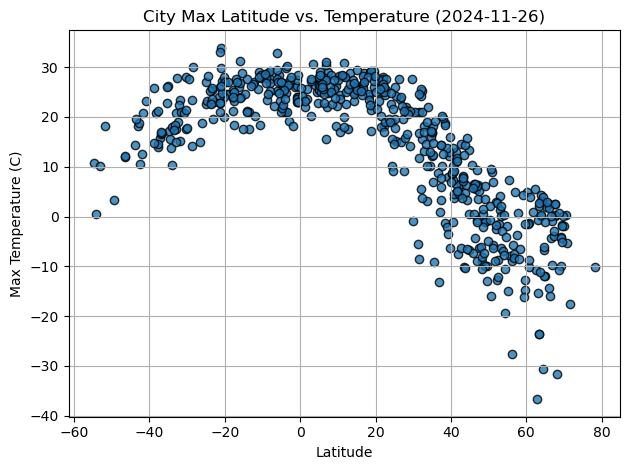

In [9]:
# import datetime to format date field
from datetime import datetime

# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']
plt.scatter(x_axis, y_axis, alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
current_date = datetime.now().strftime('%Y-%m-%d')
plt.title(f"City Max Latitude vs. Temperature ({current_date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

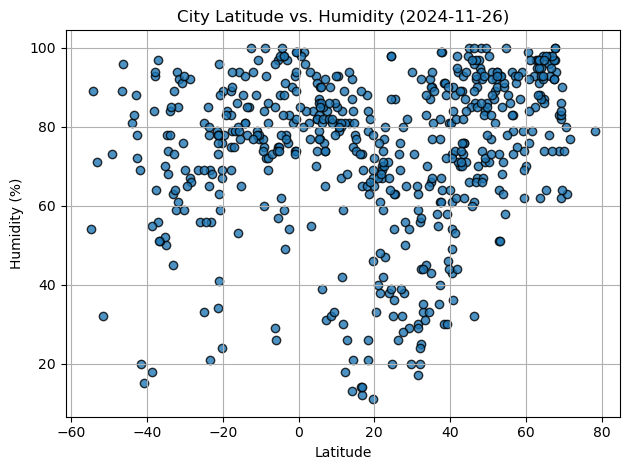

In [10]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']
plt.scatter(x_axis, y_axis, alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({current_date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

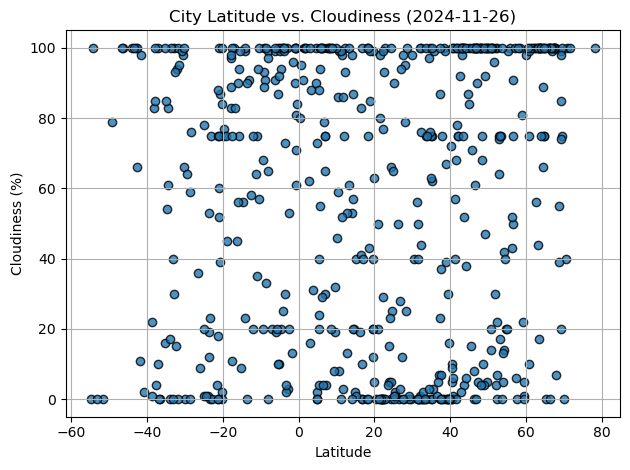

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']
plt.scatter(x_axis, y_axis, alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({current_date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

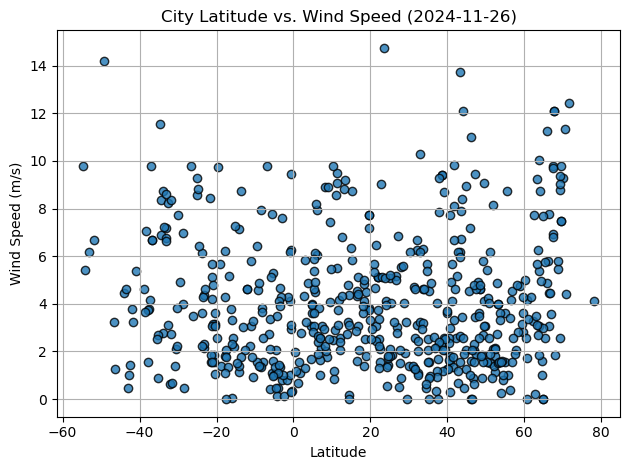

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']
plt.scatter(x_axis, y_axis, alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({current_date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [25]:
# Define a function to create Linear Regression plots
def plot_regression_line(x_values, y_values, xlabel, ylabel, title):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Plot scatter plot
    plt.scatter(x_values,y_values)
    
    # Plot regression line
    # Dynamically place annotation based on the data range
    x_annot = x_values.mean()  # Set annotation at the mean of x_values
    y_annot = regress_values.mean()  # Set annotation at the mean of the regression line
    plt.annotate(line_eq, (x_annot, y_annot), fontsize=15, color="red")
    
    plt.plot(x_values,regress_values,"r-")
#    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    
    # Plot elements
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Print r-squared value
    print(f"The r^2-value is: {rvalue**2}")
    
    # Show plot
    plt.show()

In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,silver city,32.7701,-108.2803,18.15,33,0,10.29,US,1732659236
6,nantucket,41.2835,-70.0995,13.06,88,100,5.66,US,1732659242
8,tyukhtet,56.5389,89.3011,-5.62,79,50,4.16,RU,1732659244
9,kristinestad,62.2743,21.3760,5.54,93,100,3.28,FI,1732659245
10,guatire,10.4762,-66.5427,24.42,93,59,1.18,VE,1732659106


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,22.59,81,78,8.57,PN,1732659235
2,colchani,-20.3000,-66.9333,20.05,24,84,3.16,BO,1732659237
3,port-aux-francais,-49.3500,70.2167,3.30,73,79,14.18,TF,1732659238
4,arauco,-37.2463,-73.3175,15.68,56,10,4.17,CL,1732658965
5,flying fish cove,-10.4217,105.6791,27.77,77,57,0.93,CX,1732659241


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7266316735641306


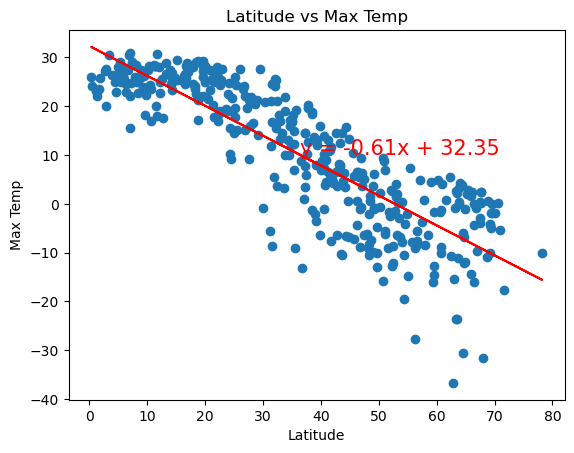

In [28]:
# Linear regression on Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Max Temp']

xlabel = 'Latitude'
ylabel = 'Max Temp'
title = 'Latitude vs Max Temp'

plot_regression_line(x_axis, y_axis, xlabel, ylabel, title) 

The r^2-value is: 0.4041811446027336


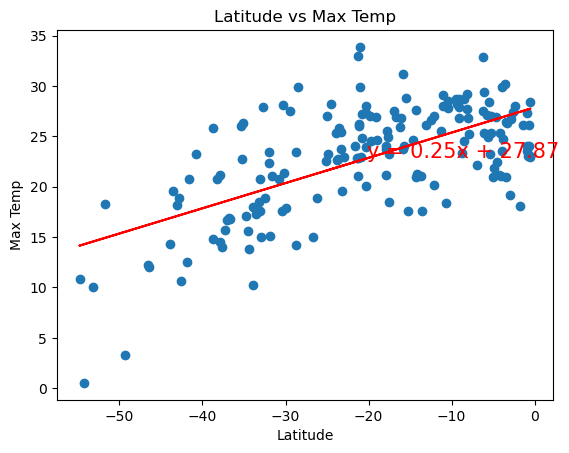

In [29]:
# Linear regression on Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Max Temp']

xlabel = 'Latitude'
ylabel = 'Max Temp'
title = 'Latitude vs Max Temp'

plot_regression_line(x_axis, y_axis, xlabel, ylabel, title)

**Discussion about the linear relationship:** 
- The Northen hemisphere demonstrates a strong negative correlation between latitude and temperature with a correlation coefficient of 0.7266316735641306.
- The Southern hemisphere demonstrates a weak positive correlation between latitude and temperature with a correlation coefficient of 0.4041811446027336.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.08021814203977214


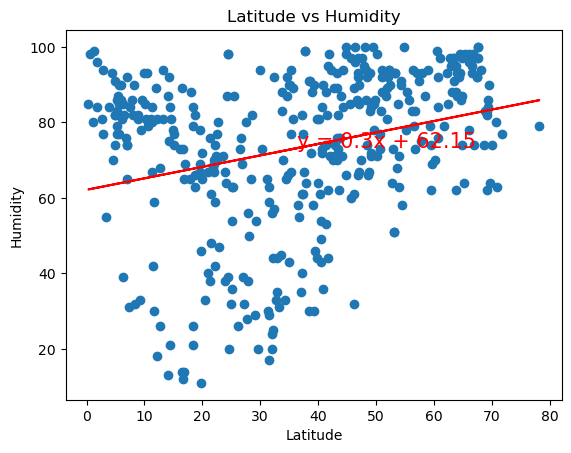

In [30]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Humidity']

xlabel = 'Latitude'
ylabel = 'Humidity'
title = 'Latitude vs Humidity'

plot_regression_line(x_axis, y_axis, xlabel, ylabel, title) 

The r^2-value is: 0.06984090547284534


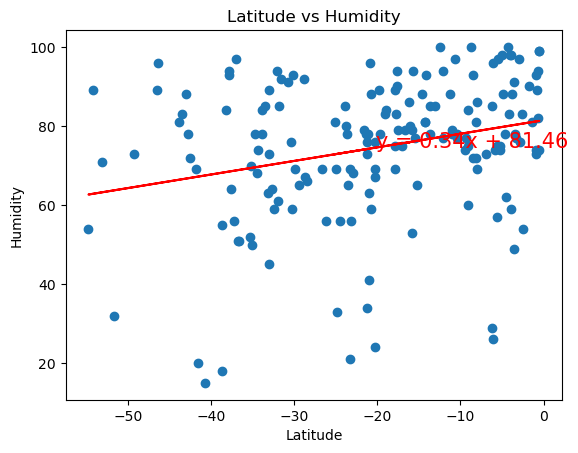

In [31]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Humidity']

xlabel = 'Latitude'
ylabel = 'Humidity'
title = 'Latitude vs Humidity'

plot_regression_line(x_axis, y_axis, xlabel, ylabel, title)

**Discussion about the linear relationship:**
- The Northen hemisphere demonstrates a weak positive correlation between latitude and humidity with a correlation coefficient of 0.08021814203977214.
- The Southern hemisphere demonstrates a weak positive correlation between latitude and humidity with a correlation coefficient of 0.06984090547284534.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.026792167979989987


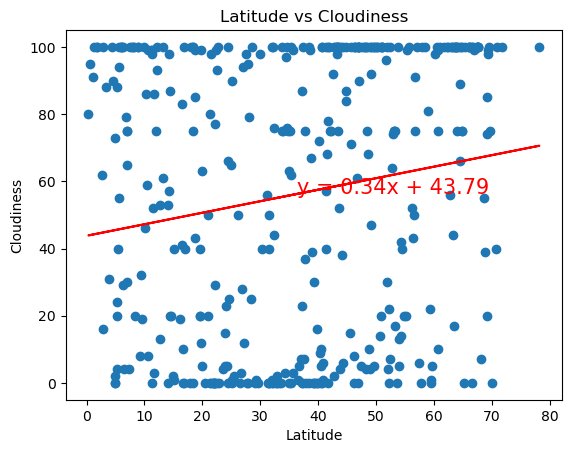

In [32]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Cloudiness']

xlabel = 'Latitude'
ylabel = 'Cloudiness'
title = 'Latitude vs Cloudiness'

plot_regression_line(x_axis, y_axis, xlabel, ylabel, title) 

The r^2-value is: 0.02222043038256487


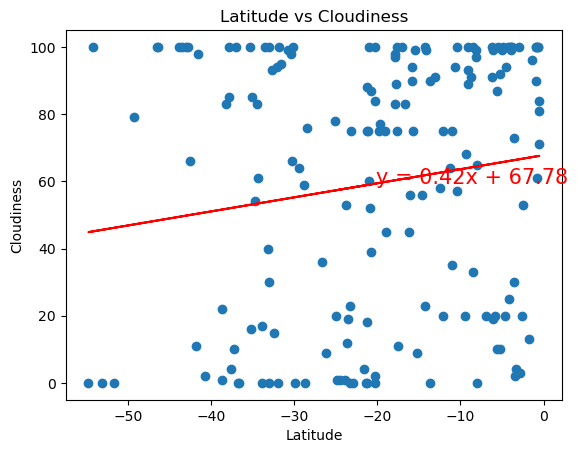

In [33]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Cloudiness']

xlabel = 'Latitude'
ylabel = 'Cloudiness'
title = 'Latitude vs Cloudiness'

plot_regression_line(x_axis, y_axis, xlabel, ylabel, title)

**Discussion about the linear relationship:**
- The Northen hemisphere demonstrates a weak positive correlation between latitude and cloudiness with a correlation coefficient of 0.026792167979989987.
- The Southern hemisphere demonstrates a weak positive correlation between latitude and cloudiness with a correlation coefficient of 0.02222043038256487.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.011340413991772175


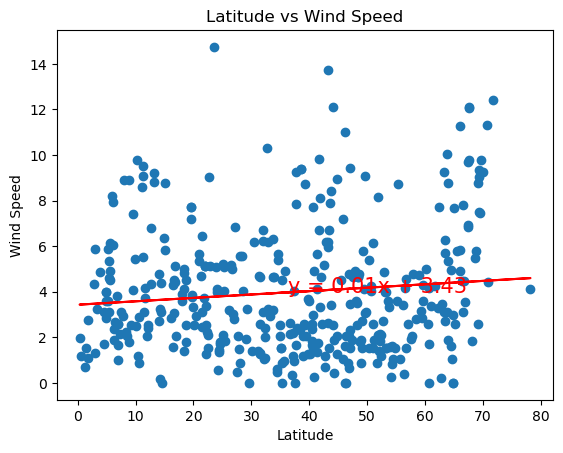

In [34]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Wind Speed']

xlabel = 'Latitude'
ylabel = 'Wind Speed'
title = 'Latitude vs Wind Speed'

plot_regression_line(x_axis, y_axis, xlabel, ylabel, title) 

The r^2-value is: 0.09575298078493417


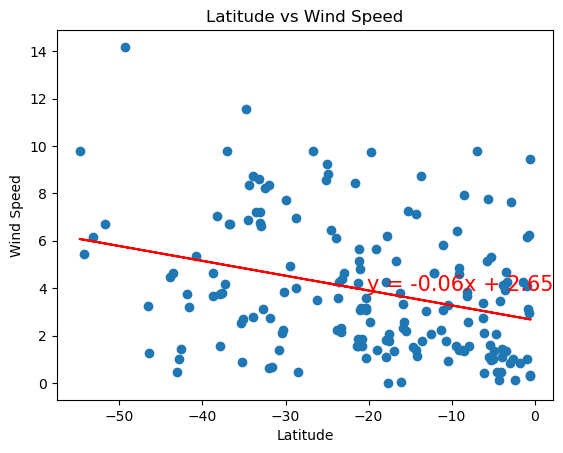

In [35]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Wind Speed']

xlabel = 'Latitude'
ylabel = 'Wind Speed'
title = 'Latitude vs Wind Speed'

plot_regression_line(x_axis, y_axis, xlabel, ylabel, title)

**Discussion about the linear relationship:** 
- The Northen hemisphere demonstrates a weak positive correlation between latitude and wind speed with a correlation coefficient of 0.011340413991772175.
- The Southern hemisphere demonstrates a weak negative correlation between latitude and wind speed with a correlation coefficient of 0.09575298078493417.